In [7]:
import numpy as np
import pandas as pd

import os


In [8]:
data = pd.read_csv('/content/Churn_Modelling.csv')

In [9]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
columns = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
           'IsActiveMember', 'EstimatedSalary', 'Exited']

for col in columns:
    print(col, data[col].nunique())


CreditScore 460
Geography 3
Gender 2
Age 70
Tenure 11
Balance 6382
NumOfProducts 4
HasCrCard 2
IsActiveMember 2
EstimatedSalary 9999
Exited 2


# 1. Data Exploration:
## 1.1 Data Description:

- **Customer ID:** A unique identifier for each customer
- **Surname:** The customer's surname or last name
- **Credit Score:** A numerical value representing the customer's credit score
- **Geography:** The country where the customer resides
- **Gender:** The customer's gender
- **Age:** The customer's age.
- **Tenure:** The number of years the customer has been with the bank
- **Balance:** The customer's account balance
- **NumOfProducts:** The number of bank products the customer uses (e.g., savings account, credit card)
- **HasCrCard:** Whether the customer has a credit card
- **IsActiveMember:** Whether the customer is an active member
- **EstimatedSalary:** The estimated salary of the customer
- **Exited:** Whether the customer has churned (Target Variable)

In [ ]:
data.describe()

In [ ]:
data.isnull().sum()

In [13]:
target_variable_counts = data['Exited'].value_counts()
print("Distribution of Target Variable (Exited):")
print(target_variable_counts)

Distribution of Target Variable (Exited):
0    7963
1    2037
Name: Exited, dtype: int64


In [14]:

unique_counts = data.nunique()
threshold = 12
continuous_vars = unique_counts[unique_counts > threshold].index.tolist()
categorical_vars = unique_counts[unique_counts <= threshold].index.tolist()
if 'Exited' in categorical_vars:
    categorical_vars.remove('Exited')
if 'RowNumber' in continuous_vars:
    continuous_vars.remove('RowNumber')
if 'CustomerId' in continuous_vars:
    continuous_vars.remove('CustomerId')
if 'Surname' in continuous_vars:
    continuous_vars.remove('Surname')


print(f"Categorical Variables: {categorical_vars}")
print(f"Continuous/Numerical Variables: {continuous_vars}")


Categorical Variables: ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
Continuous/Numerical Variables: ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']


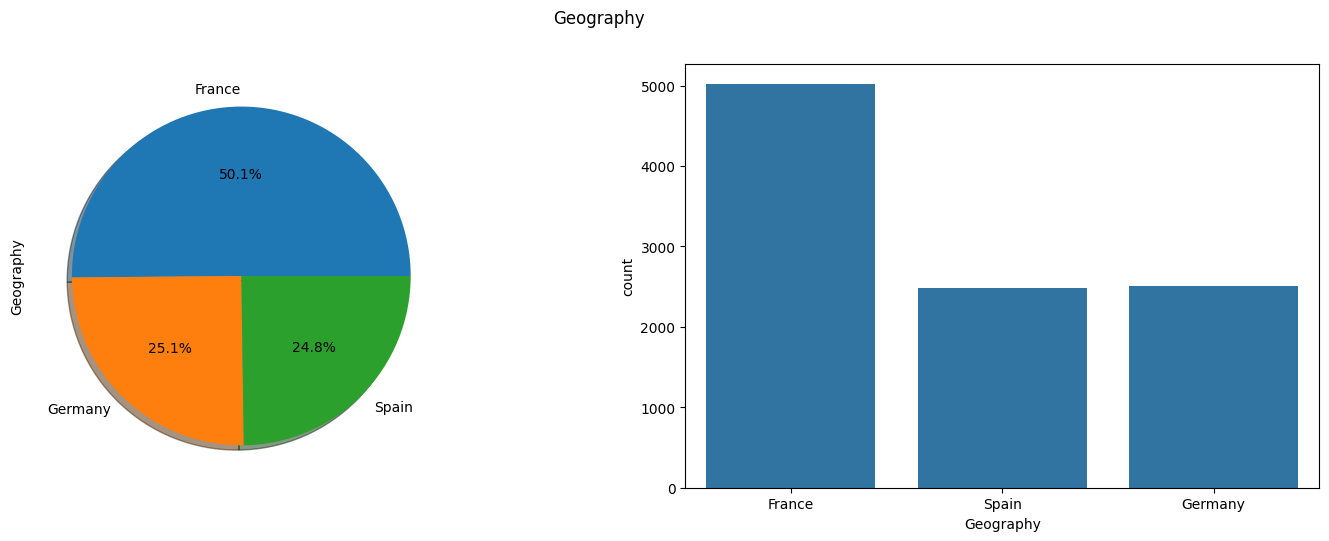

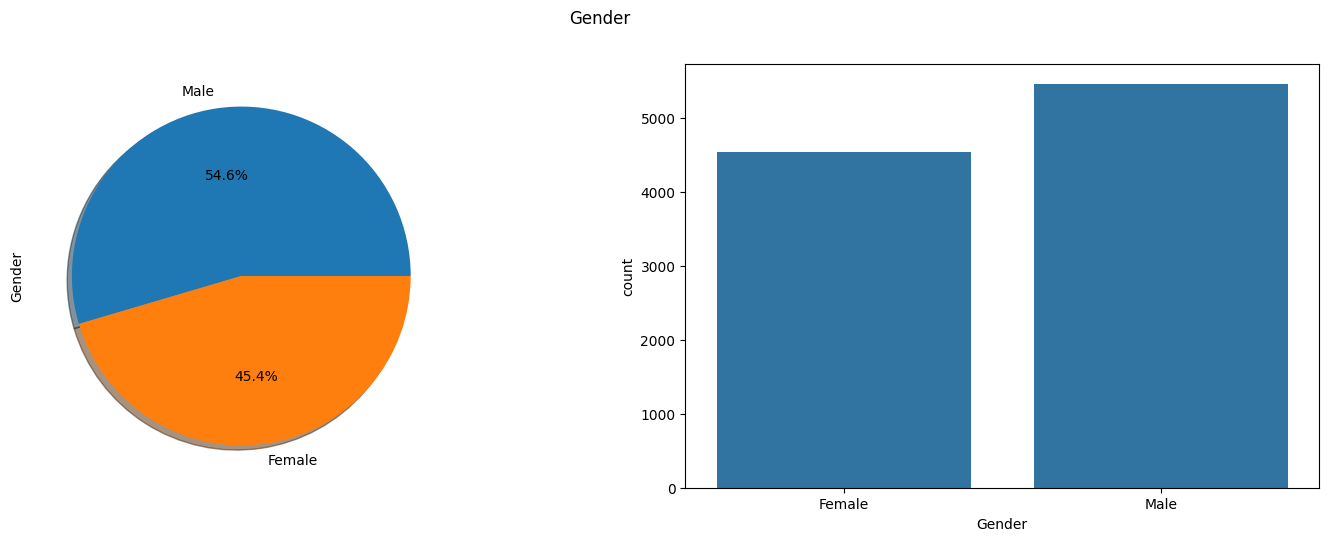

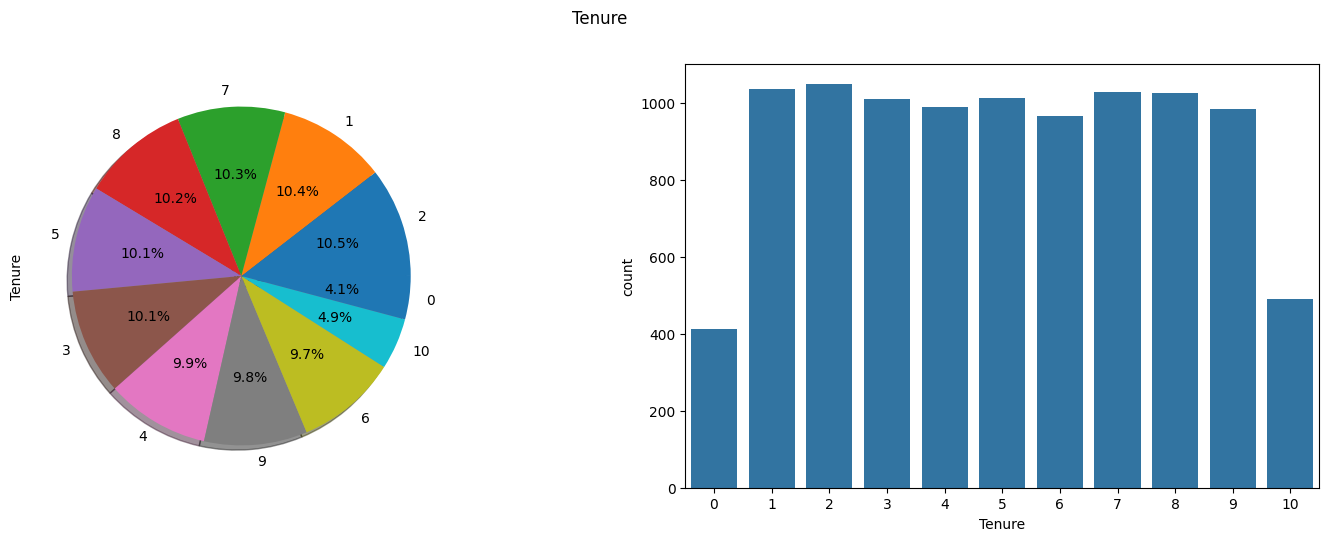

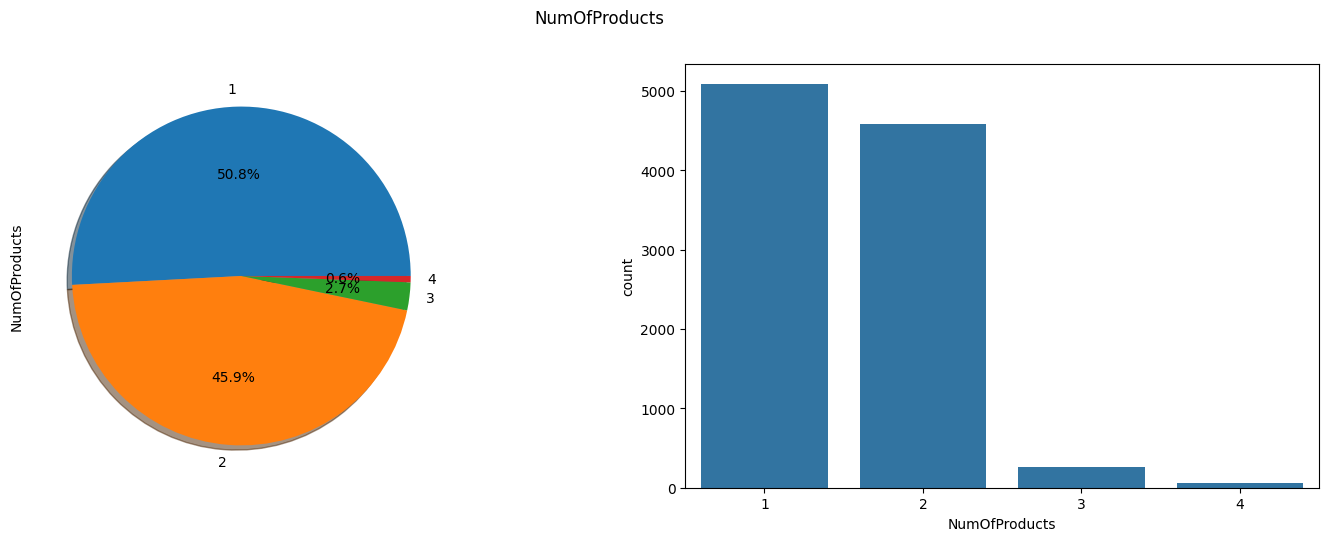

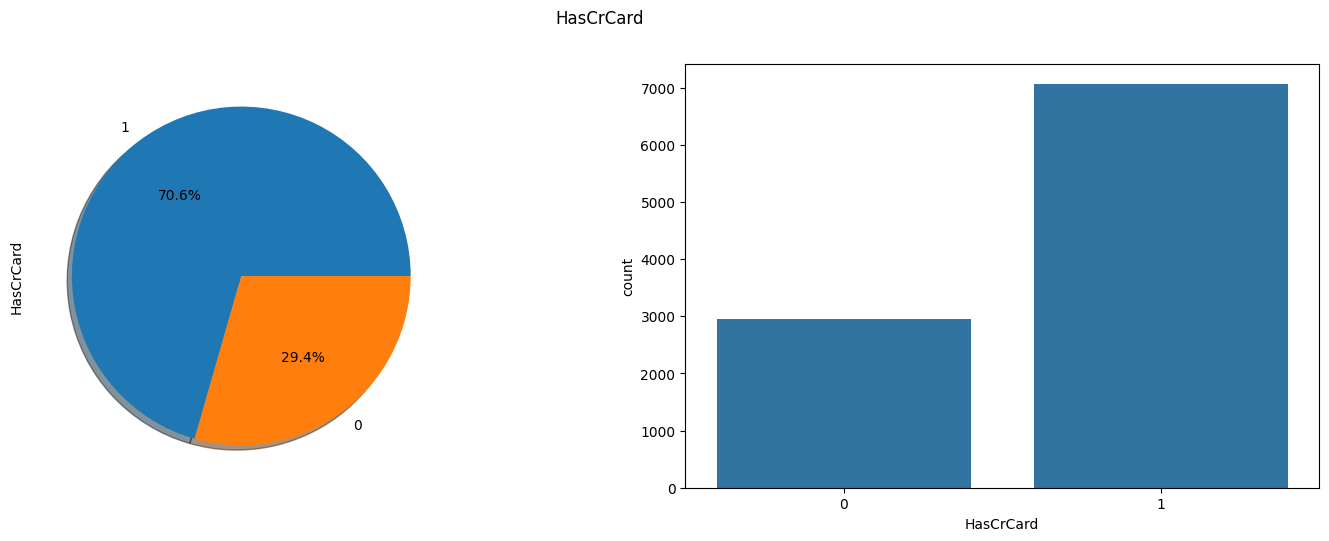

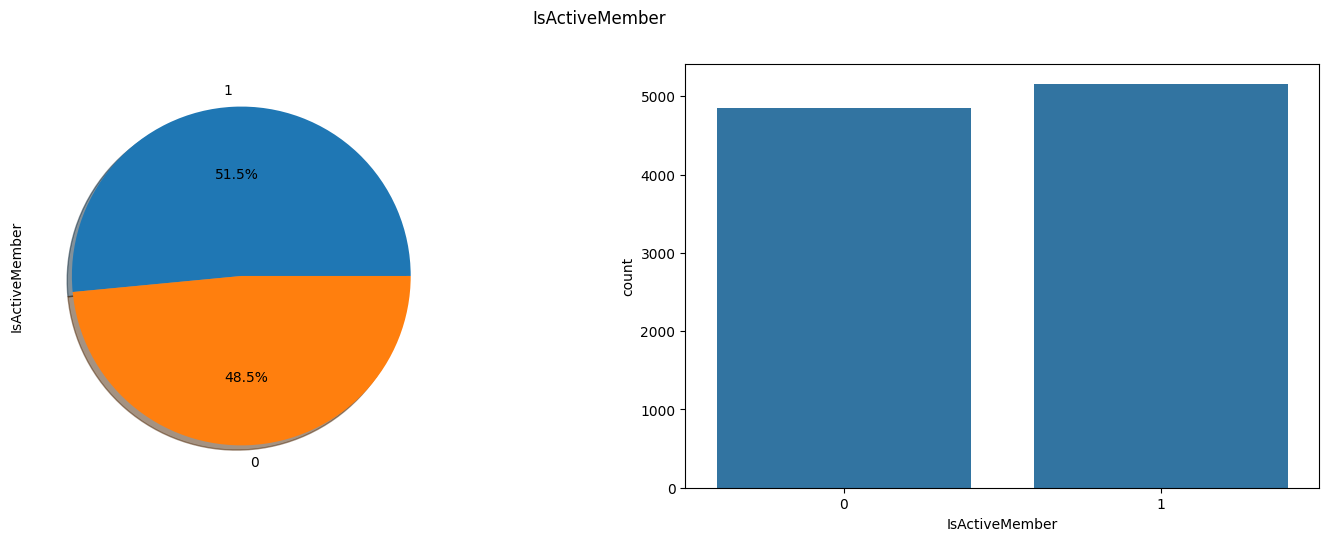

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
for column in categorical_vars:
    f,ax=plt.subplots(1,2,figsize=(18,5.5))
    data[column].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
    ax[0].set_ylabel(f'{column}')
    sns.countplot(x=column,data=data,ax=ax[1])
    plt.suptitle(f'{column}')
    plt.show()

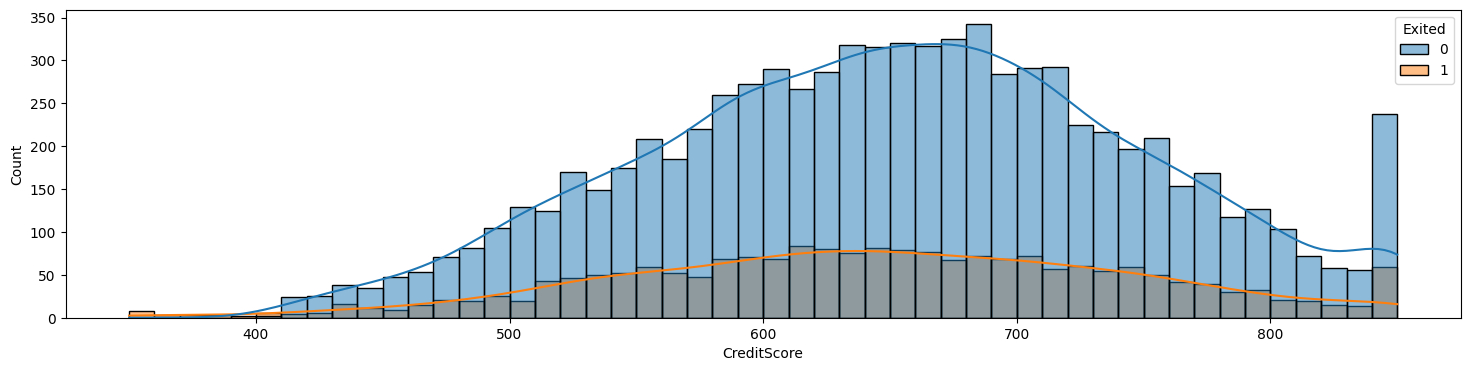

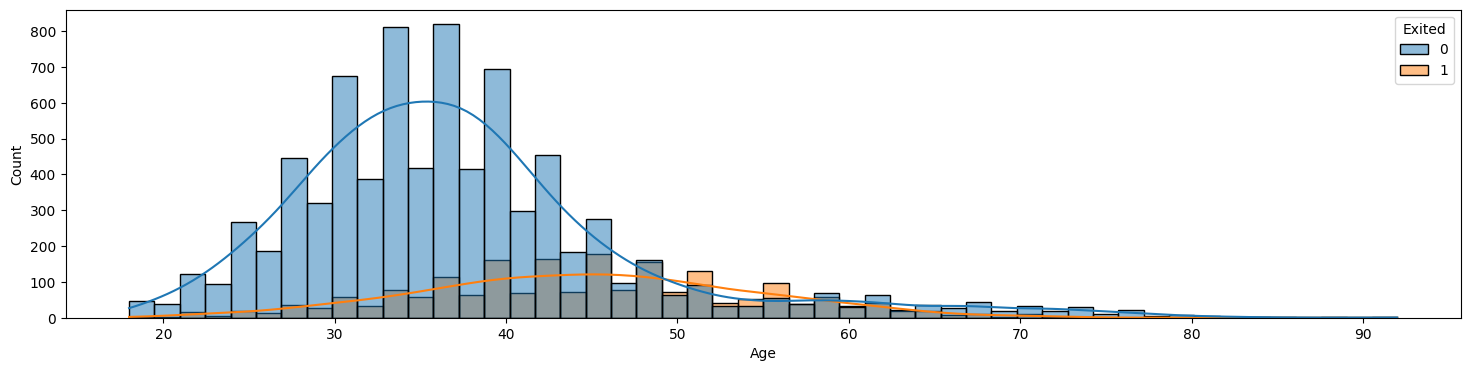

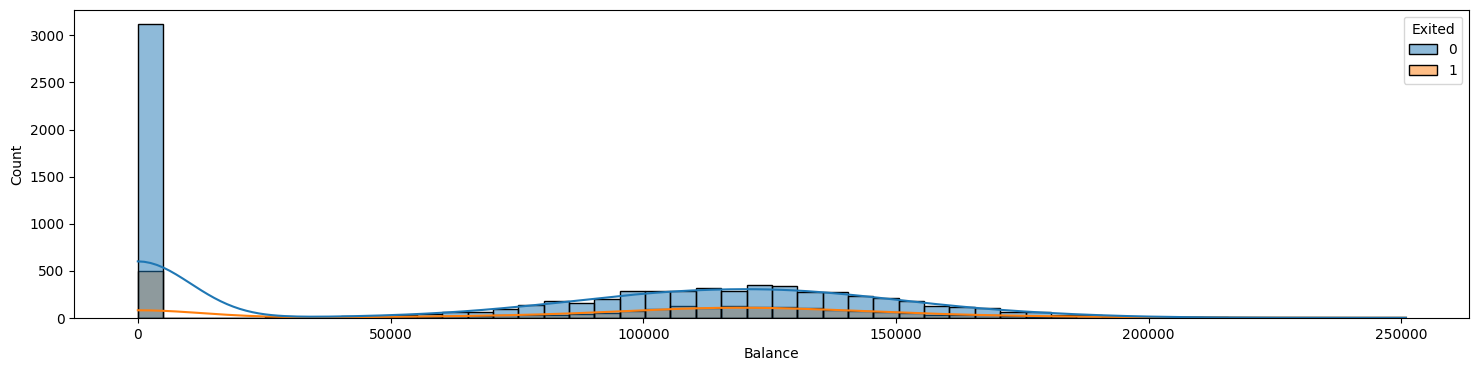

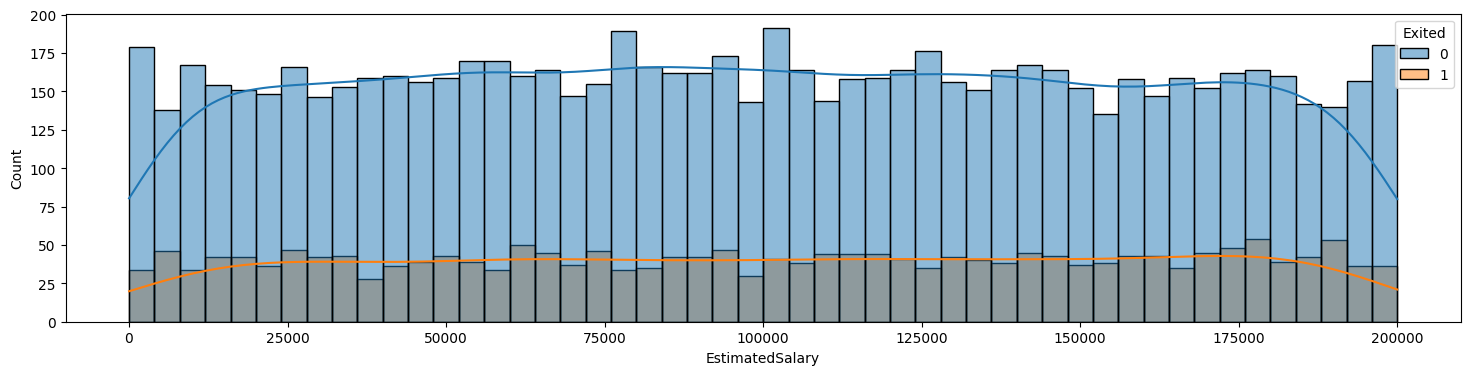

In [16]:
for column in continuous_vars:
    fig, ax = plt.subplots(figsize=(18, 4))
    fig = sns.histplot(data=data, x=column, hue="Exited", bins=50, kde=True)
    plt.show()

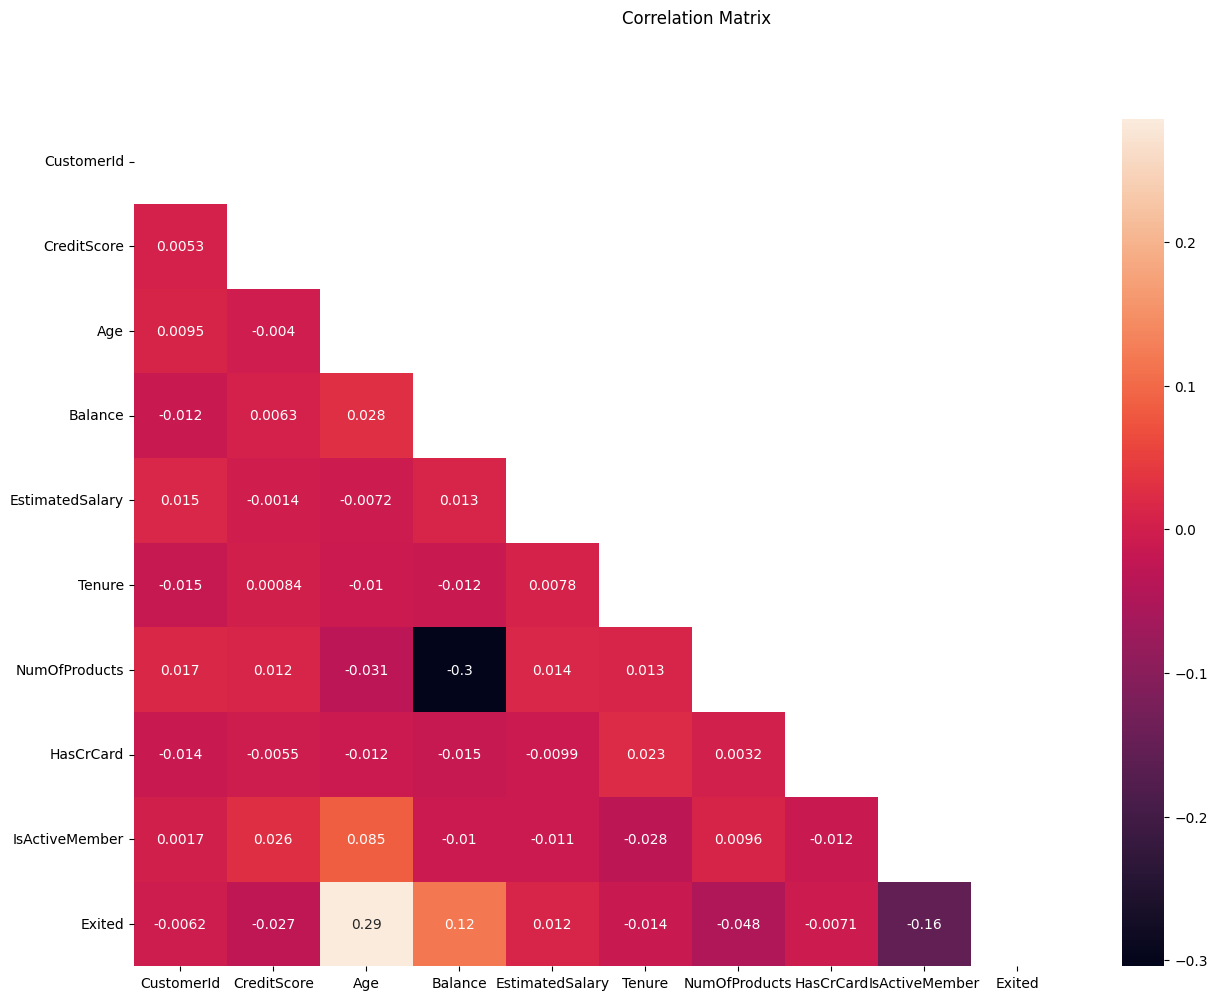

                 CustomerId  CreditScore       Age   Balance  EstimatedSalary  \
CustomerId         1.000000     0.005308  0.009497 -0.012419         0.015271   
CreditScore        0.005308     1.000000 -0.003965  0.006268        -0.001384   
Age                0.009497    -0.003965  1.000000  0.028308        -0.007201   
Balance           -0.012419     0.006268  0.028308  1.000000         0.012797   
EstimatedSalary    0.015271    -0.001384 -0.007201  0.012797         1.000000   
Tenure            -0.014883     0.000842 -0.009997 -0.012254         0.007784   
NumOfProducts      0.016972     0.012238 -0.030680 -0.304180         0.014204   
HasCrCard         -0.014025    -0.005458 -0.011721 -0.014858        -0.009933   
IsActiveMember     0.001665     0.025651  0.085472 -0.010084        -0.011421   
Exited            -0.006248    -0.027094  0.285323  0.118533         0.012097   

                   Tenure  NumOfProducts  HasCrCard  IsActiveMember    Exited  
CustomerId      -0.014883   

In [17]:
df4 = data[['CustomerId', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary',
       'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']].copy()

corr_matrix=df4.corr()

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

f,ax=plt.subplots(figsize=(15,11))
sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.suptitle('Correlation Matrix')
plt.show()
print(corr_matrix)

## 3. Modelling

In [18]:
X = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = data['Exited']

In [19]:
X_encoded = pd.get_dummies(X, columns=['Geography',
                                       'Gender',
                                       'IsActiveMember',
                                       'HasCrCard',
                                       'NumOfProducts'])

X_encoded.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,IsActiveMember_0,IsActiveMember_1,HasCrCard_0,HasCrCard_1,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,42,2,0.00,101348.88,1,0,0,1,0,0,1,0,1,1,0,0,0
1,608,41,1,83807.86,112542.58,0,0,1,1,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,113931.57,1,0,0,1,0,1,0,0,1,0,0,1,0
3,699,39,1,0.00,93826.63,1,0,0,1,0,1,0,1,0,0,1,0,0
4,850,43,2,125510.82,79084.10,0,0,1,1,0,0,1,0,1,1,0,0,0


In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)


y_pred = svm_model.predict(X_test_scaled)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.769

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.77      0.84      1607
           1       0.45      0.77      0.57       393

    accuracy                           0.77      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.84      0.77      0.79      2000



ROC-AUC Score: 0.8372530484473939


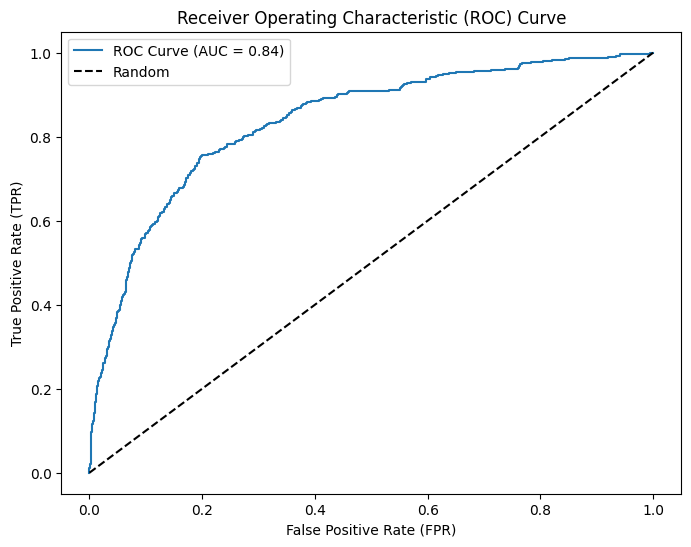

In [23]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_prob = svm_model.decision_function(X_test_scaled)

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [24]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(class_weight='balanced', random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)

y_pred_lr = lr_model.predict(X_test_scaled)

print("Logistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Model:
Accuracy: 0.771

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.77      0.84      1607
           1       0.45      0.77      0.57       393

    accuracy                           0.77      2000
   macro avg       0.69      0.77      0.71      2000
weighted avg       0.84      0.77      0.79      2000



In [25]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)


y_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Model:
Accuracy: 0.8355

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      1607
           1       0.58      0.61      0.59       393

    accuracy                           0.84      2000
   macro avg       0.74      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000



In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
}

rf_model_tuned = RandomForestClassifier(class_weight='balanced', random_state=42)

grid_search = GridSearchCV(rf_model_tuned, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


<ipython-input-27-179933fbf6db>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')


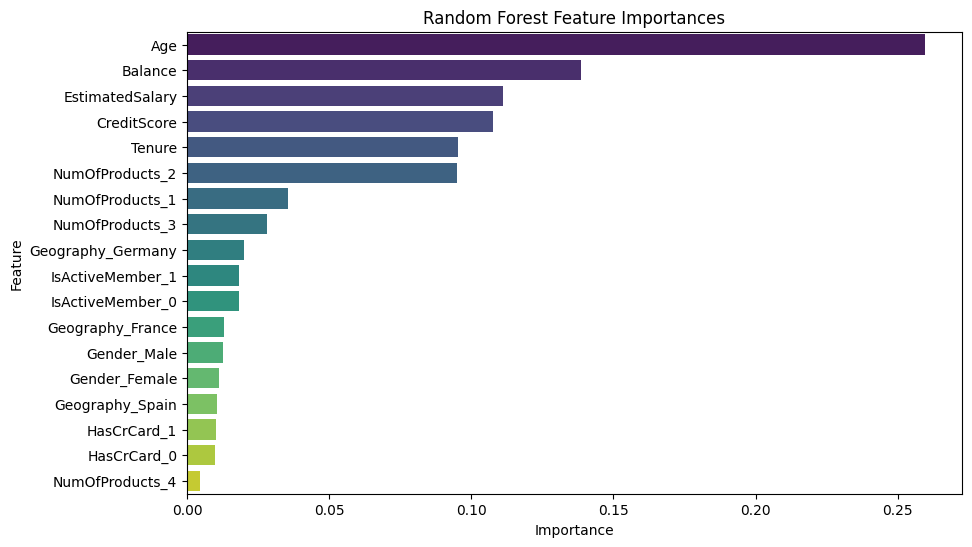

In [27]:

feature_importances = rf_model.feature_importances_

importances_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.show()


In [28]:
rf_model_tuned.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_model_tuned.predict(X_test_scaled)

print("Random Forest Model tuned:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Model tuned:
Accuracy: 0.8355

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      1607
           1       0.58      0.61      0.59       393

    accuracy                           0.84      2000
   macro avg       0.74      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000



In [29]:

top_n_features = 10

top_feature_indices = np.argsort(feature_importances)[-top_n_features:]

X_train_top_features = X_train_resampled[:, top_feature_indices]
X_test_top_features = X_test_scaled[:, top_feature_indices]

rf_model_tuned = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42
)

rf_model_tuned.fit(X_train_top_features, y_train_resampled)

y_pred_rf_tuned_top_features = rf_model_tuned.predict(X_test_top_features)

print("Random Forest Model Tuned with Top Features:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_tuned_top_features))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_tuned_top_features))


Random Forest Model Tuned with Top Features:
Accuracy: 0.832

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89      1607
           1       0.57      0.61      0.59       393

    accuracy                           0.83      2000
   macro avg       0.74      0.75      0.74      2000
weighted avg       0.84      0.83      0.83      2000

